# Task 1

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import flammkuchen as fl
from matplotlib import image as mpimg
import albumentations as A

In [2]:
data = fl.load("rectanglesdsss.sec")

In [3]:
data.keys()

dict_keys(['ground_truth', 'predicted'])

In [5]:
ground_truth = data["ground_truth"]
predicted = data["predicted"]


In [6]:
print(ground_truth[0])
print(predicted[0])

(1.2230114285248028, 3.172476462256429, 19.18975507295538, 1.494912895018739)
(3.829752495520566, 1.570699524685456, 18.371431652453644, 2.8901173804855285)


In [6]:
len(predicted)

100

In [9]:
class rectangle:
    def __init__(self,xmin,ymin,width,height):
        self.xmin = xmin
        self.ymin = ymin
        self.width = width
        self.height = height
        self.xmax = xmin + width
        self.ymax = ymin + height
        self.area = height*width
def calculate_intersect_area(rect1, rect2):  # returns None if rectangles don't intersect
    dx = min(rect1.xmax, rect2.xmax) - max(rect1.xmin, rect2.xmin)
    dy = min(rect1.ymax, rect2.ymax) - max(rect1.ymin, rect2.ymin)
    if (dx>=0) and (dy>=0):
        return dx*dy
    else:
        return 0
def calculate_union_area(rect1,rect2):
    rect1_area =  rect1.area
    rect2_area = rect2.area
    union_area = rect1_area + rect2_area - calculate_intersect_area(rect1, rect2)
    return union_area
    
def calculate_iou(rect1,rect2):
    intersect_area = calculate_intersect_area(rect1, rect2)
    union_area = calculate_union_area(rect1,rect2)
    iou = np.array([intersect_area/union_area])
    return iou
    

In [10]:
iou_array = np.array([])
for item1,item2 in zip(ground_truth,predicted):
    rect1 = rectangle(item1[0],item1[1],item1[2],item1[3])
    rect2 = rectangle(item2[0],item2[1],item2[2],item2[3])
    iou = calculate_iou(rect1,rect2)
    iou_array = np.concatenate((iou_array,iou),axis=0)
    

In [11]:
rect1 = rectangle(ground_truth[0][0],ground_truth[0][1],ground_truth[0][2],ground_truth[0][3])
rect2 = rectangle(predicted[0][0],predicted[0][1],predicted[0][2],predicted[0][3])
iou = calculate_iou(rect1,rect2)

In [14]:
iou_array = iou_array.round(2)

In [15]:
iou_array*100

array([35., 11., 52., 48.,  7., 30., 14.,  7., 19., 13., 45., 44., 14.,
       19., 14., 10., 13.,  0., 39., 31.,  1., 15., 65.,  4.,  0., 26.,
       27., 20., 12., 17.,  6., 43.,  8.,  7., 35., 38.,  0., 33.,  6.,
       12.,  0., 49.,  0., 48., 38., 45., 19.,  7., 36.,  0., 12., 18.,
       42., 26., 15., 19., 29., 37., 37.,  6.,  0., 68.,  0., 12., 22.,
       38., 22., 16., 23., 18., 23.,  5.,  3.,  0.,  6., 25., 52., 42.,
        4., 21., 16., 18., 17.,  0., 20., 25., 11.,  8., 22., 28., 37.,
       17., 23., 39.,  6., 14., 19., 18., 16., 54.])

In [16]:
unique_values, counts = np.unique(iou_array, return_counts=True)

In [17]:
unique_values

array([0.  , 0.01, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.33, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.42, 0.43, 0.44, 0.45, 0.48, 0.49, 0.52, 0.54, 0.65,
       0.68])

array([0.35, 0.11, 0.52, 0.48, 0.07, 0.3 , 0.14, 0.07, 0.19, 0.13, 0.45,
       0.44, 0.14, 0.19, 0.14, 0.1 , 0.13, 0.  , 0.39, 0.31, 0.01, 0.15,
       0.65, 0.04, 0.  , 0.26, 0.27, 0.2 , 0.12, 0.17, 0.06, 0.43, 0.08,
       0.07, 0.35, 0.38, 0.  , 0.33, 0.06, 0.12, 0.  , 0.49, 0.  , 0.48,
       0.38, 0.45, 0.19, 0.07, 0.36, 0.  , 0.12, 0.18, 0.42, 0.26, 0.15,
       0.19, 0.29, 0.37, 0.37, 0.06, 0.  , 0.68, 0.  , 0.12, 0.22, 0.38,
       0.22, 0.16, 0.23, 0.18, 0.23, 0.05, 0.03, 0.  , 0.06, 0.25, 0.52,
       0.42, 0.04, 0.21, 0.16, 0.18, 0.17, 0.  , 0.2 , 0.25, 0.11, 0.08,
       0.22, 0.28, 0.37, 0.17, 0.23, 0.39, 0.06, 0.14, 0.19, 0.18, 0.16,
       0.54])

In [39]:
bins = np.array([0.1*i for i in range(0,8)])

In [40]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

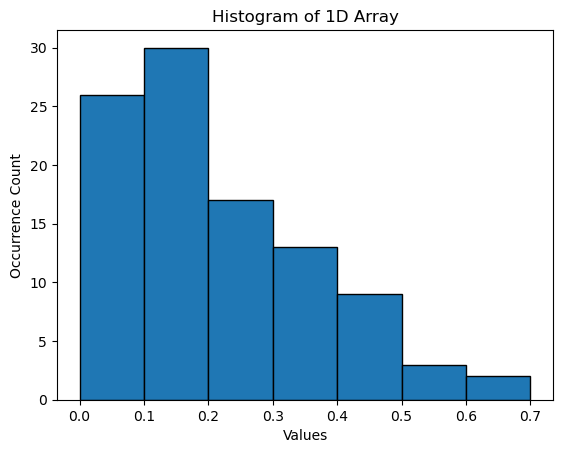

In [41]:
plt.hist(iou_array, bins=bins, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Occurrence Count')
plt.title('Histogram of 1D Array')

# Show the plot
plt.show()

# Task 2

In [2]:
def load_baglsfolder():
    """Function to return the list with all files inside the directory"""
    BAGLS_PATH = r"""D:/Personal/personal/pythonproj/DSSS/DSSS_Scripts/Mini_BAGLS_dataset/Mini_BAGLS_dataset/"""
    files = os.listdir(BAGLS_PATH)
    return files

def file_seg(files):
    """Function to return segregate meta, masks, png filenames into separate lists"""
    meta = []
    png = []
    seg = []
    for file in files:
        if file[-4:] == 'meta':
            meta.append(file)
        elif file[-3:] == 'png':
            if file[-7:] == 'seg.png':
                seg.append(file)
            else:
                png.append(file)
        else:
            pass
    return meta, png, seg

def retrieve_seg_meta(rand_png,seg,meta):
    """Function to return corresponding mask and meta data file names from source list"""
    for segfile in seg:
        if rand_png[0:rand_png.index('.')] == segfile[0:segfile.index('_')]:
            return_seg = segfile
    for metafile in meta:
        if rand_png[0:rand_png.index('.')] == metafile[0:metafile.index('.')]:
            return_meta = metafile
    return return_seg,return_meta


In [16]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [3]:
file_list = load_baglsfolder()
meta, png, seg = file_seg(file_list)

In [7]:
np.random.seed(23336330)
req_png = np.random.choice(png)

In [8]:
req_seg, req_meta = retrieve_seg_meta(req_png,seg,meta)

In [10]:
req_seg, req_meta, req_png

('83_seg.png', '83.meta', '83.png')

In [14]:
image = mpimg.imread(f"D:/Personal/personal/pythonproj/DSSS/DSSS_Scripts/Mini_BAGLS_dataset/Mini_BAGLS_dataset/{req_png}")
mask = mpimg.imread(f"D:/Personal/personal/pythonproj/DSSS/DSSS_Scripts/Mini_BAGLS_dataset/Mini_BAGLS_dataset/{req_seg}")

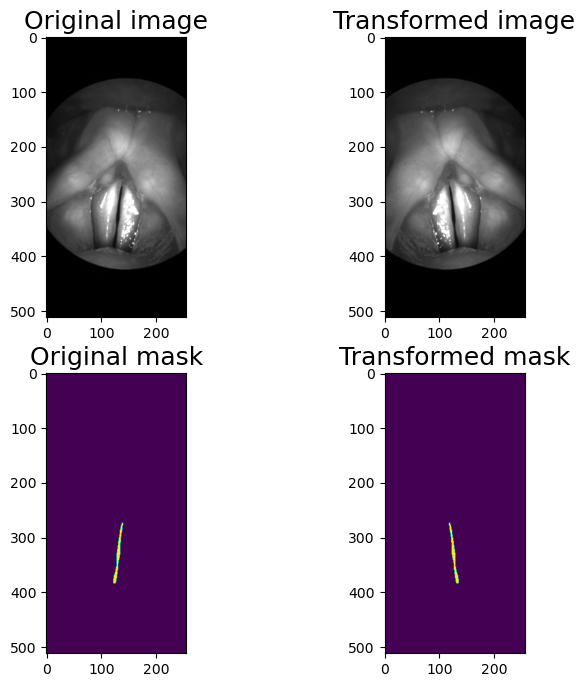

In [17]:
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

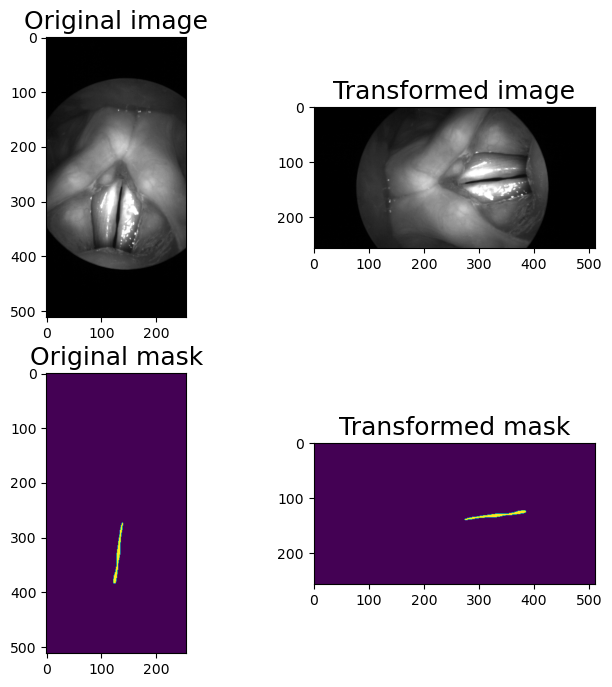

In [18]:
aug = A.Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)